In [1]:
!pip install python-igraph
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install easygui
!pip install cairocffi
!pip install pm4py


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import igraph as ig
import easygui
from matplotlib import pyplot as plt
import numpy as np
import scipy
import statistics
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [3]:
#read data
transactions = pd.read_csv('testfiles\TRANSACTION1.csv', sep=';')
event_log = pd.read_csv('testfiles\eventlog.csv', sep=';')
balance_history = pd.read_csv('testfiles\BalanceHistory.csv', sep=';')
participants = pd.read_csv('testfiles\Participants1.csv', sep=';')

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\B'
<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\B'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\toont\AppData\Local\Temp\ipykernel_15220\3680898682.py:2: SyntaxWarning: invalid escape sequence '\T'
  transactions = pd.read_csv('testfiles\TRANSACTION1.csv', sep=';')
C:\Users\toont\AppData\Local\Temp\ipykernel_15220\3680898682.py:3: SyntaxWarning: invalid escape sequence '\e'
  event_log = pd.read_csv('testfiles\eventlog.csv', sep=';')
C:\Users\toont\AppData\Local\Temp\ipykernel_15220\3680898682.py:4: SyntaxWarning: invalid escape sequence '\B'
  balance_history = pd.read_csv('testfiles\BalanceHistory.csv', sep=';')
C:\Users\toont\AppData\Local\Temp\ipykernel_15220\3680898682.py:5

In [13]:
balance_history=balance_history[balance_history["Account ID"]==0]
print(balance_history[balance_history["PartID"]==1].transpose())
balance_history


                               0
PartID                         1
Account ID                     0
2024-03-01 22:00:00  19397377175
2024-03-01 22:01:00  19397377175
2024-03-01 22:02:00  19397377175
...                          ...
2024-03-02 21:56:00 -12794474539
2024-03-02 21:57:00 -12794474539
2024-03-02 21:58:00 -12794474539
2024-03-02 21:59:00 -12794474539
2024-03-02 21:59:59 -12794474539

[1443 rows x 1 columns]


PartID  Account ID  2024-03-01 22:00:00  2024-03-01 22:01:00  \
0         1           0          19397377175          19397377175   
51        2           0           9335508155           9335508155   
102       3           0          25934428703          25934428703   
153       4           0           5836695811           5836695811   
204       5           0          17824648085          17824648085   
255       6           0          20593862853          20593862853   
306       7           0           5297196695           5297196695   
357       8           0          23283961922          23283961922   
408       9           0           5886364369           5886364369   
459      10           0          14126319368          14126319368   
510      11           0           7580982410           7580982410   
561      12           0          17669720308          17669720308   
612      13           0          15964402586          15964402586   
663      14           0           9294900985           9294900985   
714      15           0          23392221643          23392221643   
765      16           0          23811946071          23811946071   
816      17           0           7502054195           7502054195   
867      18           0          23049696505          23049696505   
918      19           0          20022793720          20022793720   
969      20           0          20830645918          20830645918   

     2024-03-01 22:02:00  2024-03-01 22:03:00  2024-03-01 22:04:00  \
0            19397377175          19397377175          19397377175   
51            9335508155           9335508155           9335508155   
102          25934428703          25934428703          25934428703   
153           5836695811           5836695811           5836695811   
204          17824648085          17824648085          17824648085   
255          20593862853          20593862853          20593862853   
306           5297196695           5297196695           5297196695   
357          23283961922          23283961922          23283961922   
408           5886364369           5886364369           5886364369   
459          14126319368          14126319368          14126319368   
510           7580982410           7580982410           7580982410   
561          17669720308          17669720308          17669720308   
612          15964402586          15964402586          15964402586   
663           9294900985           9294900985           9294900985   
714          23392221643          23392221643          23392221643   
765          23811946071          23811946071          23811946071   
816           7502054195           7502054195           7502054195   
867          23049696505          23049696505          23049696505   
918          20022793720          20022793720          20022793720   
969          20830645918          20830645918          20830645918   

     2024-03-01 22:05:00  2024-03-01 22:06:00  2024-03-01 22:07:00  ...  \
0            19397377175          19397377175          19397377175  ...   
51            9335508155           9335508155           9335508155  ...   
102          25934428703          25934428703          25934428703  ...   
153           5836695811           5836695811           5836695811  ...   
204          17824648085          17824648085          17824648085  ...   
255          20593862853          20593862853          20593862853  ...   
306           5297196695           5297196695           5297196695  ...   
357          23283961922          23283961922          23283961922  ...   
408           5886364369           5886364369           5886364369  ...   
459          14126319368          14126319368          14126319368  ...   
510           7580982410           7580982410           7580982410  ...   
561          17669720308          17669720308          17669720308  ...   
612          15964402586          15964402586          15964402586  ...   
663           9294900985          

In [14]:
#join transactions with event log
network_df = pd.merge(event_log, transactions, left_on=['TID'], right_on=['TID'], how='inner')
network_df = pd.merge(network_df, participants, left_on=['FromParticipantId', 'FromAccountId'], right_on=['Part ID', 'Account ID'], how='inner')
network_df = network_df.rename(columns={'Part ID': 'Sending Part', 'Account ID': 'Sending Account ID', 'Balance': 'Initial Account Balance'})
network_df_settling=network_df[network_df["Activity"]=="Settling"]
print(network_df_settling)

          TID            Starttime              Endtime  Activity  \
991        68  2024-03-02 01:30:01  2024-03-02 01:30:01  Settling   
992       197  2024-03-02 01:30:01  2024-03-02 01:30:01  Settling   
1080      333  2024-03-02 01:32:03  2024-03-02 01:32:03  Settling   
1081      536  2024-03-02 01:32:03  2024-03-02 01:32:03  Settling   
1111      505  2024-03-02 01:32:48  2024-03-02 01:32:48  Settling   
...       ...                  ...                  ...       ...   
149533  28672  2024-03-02 19:29:54  2024-03-02 19:29:54  Settling   
149557   5222  2024-03-02 19:29:56  2024-03-02 19:29:56  Settling   
149558  28677  2024-03-02 19:29:56  2024-03-02 19:29:56  Settling   
149563   4261  2024-03-02 19:29:58  2024-03-02 19:29:58  Settling   
149564  28678  2024-03-02 19:29:58  2024-03-02 19:29:58  Settling   

                       Time         Value  FromParticipantId  FromAccountId  \
991     2024-03-02 00:12:39  2.415275e+08                  1             32   
992     2024-

In [18]:
timestamp_dict = {}

# Initialize an empty dictionary to store the results


# Iterate over each row in the pivot table
for index, row in balance_history.iterrows():
    participant_id = row['PartID']
    account_id = row['Account ID']
    
    prev_sign = None  # Variable to store the previous sign
    
    # Iterate over each timestamp column in the pivot table
    for col_name, value in row.items():
        if col_name in ['PartID', 'Account ID']:
            continue
        
        # Extract the timestamp from the column name
        timestamp = pd.to_datetime(col_name)
        
        # Determine the sign of the value
        if value > 0:
            sign = 'positive'
        elif value < 0:
            sign = 'negative'
        else:
            sign = 'zero'
        
        # Check if the sign has changed from the previous timestamp
        if sign != prev_sign:
            # Create a key for the participant if it doesn't exist
            if participant_id not in timestamp_dict:
                timestamp_dict[participant_id] = []
            
            # Add the timestamp and the sign to the dictionary
            timestamp_dict[participant_id].append((timestamp, sign))
        
        # Update the previous sign
        prev_sign = sign

# Print the resulting dictionary
print(timestamp_dict)

{1: [(Timestamp('2024-03-01 22:00:00'), 'positive'), (Timestamp('2024-03-02 07:55:00'), 'negative'), (Timestamp('2024-03-02 07:56:00'), 'positive'), (Timestamp('2024-03-02 07:59:00'), 'negative'), (Timestamp('2024-03-02 08:02:00'), 'positive'), (Timestamp('2024-03-02 08:04:00'), 'negative'), (Timestamp('2024-03-02 08:05:00'), 'positive'), (Timestamp('2024-03-02 08:06:00'), 'negative'), (Timestamp('2024-03-02 08:07:00'), 'positive'), (Timestamp('2024-03-02 08:08:00'), 'negative'), (Timestamp('2024-03-02 09:12:00'), 'positive'), (Timestamp('2024-03-02 09:24:00'), 'negative'), (Timestamp('2024-03-02 09:25:00'), 'positive'), (Timestamp('2024-03-02 09:26:00'), 'negative')], 2: [(Timestamp('2024-03-01 22:00:00'), 'positive'), (Timestamp('2024-03-02 05:27:00'), 'negative')], 3: [(Timestamp('2024-03-01 22:00:00'), 'positive'), (Timestamp('2024-03-02 11:16:00'), 'negative')], 4: [(Timestamp('2024-03-01 22:00:00'), 'positive')], 5: [(Timestamp('2024-03-01 22:00:00'), 'positive'), (Timestamp('202

# 1 edge = 1 transaction

In [7]:
import pandas as pd
from igraph import Graph, plot
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV

#transactions = pd.read_csv('TRANSACTION1.csv', sep=';')
df = transactions[(transactions['FromAccountId'] != 0) | (transactions['ToAccountId'] != 0)].copy()

# Extract unique participant IDs
participants = pd.DataFrame({
    'id': pd.concat([df['FromParticipantId'], df['ToParticipantId']]).unique()
})

# Create a graph with participants as nodes
g = Graph(directed=True)
g.add_vertices(participants['id'].astype(str))

# Add edges for each transaction
for _, row in df.iterrows():
    g.add_edge(str(row['FromParticipantId']), str(row['ToParticipantId']))

# Calculate in-degree and out-degree for each participant
in_degree = g.indegree()
out_degree = g.outdegree()

# Print results
for v in g.vs:
    print(f"Participant {v['name']} - In-degree: {in_degree[v.index]}, Out-degree: {out_degree[v.index]}")

# Visualize the graph
layout = g.layout('kk')  # Kamada-Kawai layout
visual_style = {
    "vertex_size": 20,
    "vertex_label": g.vs['name'],
    "edge_width": [1 for _ in g.es],  # Uniform edge width as weights are not considered
    "layout": layout,
    "bbox": (600, 600),
    "margin": 50
}
plot(g, **visual_style)


Participant 14 - In-degree: 1164, Out-degree: 878
Participant 8 - In-degree: 961, Out-degree: 852
Participant 16 - In-degree: 1216, Out-degree: 838
Participant 10 - In-degree: 568, Out-degree: 835
Participant 11 - In-degree: 863, Out-degree: 821
Participant 19 - In-degree: 233, Out-degree: 852
Participant 3 - In-degree: 408, Out-degree: 838
Participant 12 - In-degree: 681, Out-degree: 828
Participant 6 - In-degree: 920, Out-degree: 777
Participant 5 - In-degree: 749, Out-degree: 807
Participant 1 - In-degree: 816, Out-degree: 817
Participant 18 - In-degree: 0, Out-degree: 820
Participant 17 - In-degree: 843, Out-degree: 884
Participant 13 - In-degree: 1007, Out-degree: 877
Participant 4 - In-degree: 812, Out-degree: 802
Participant 7 - In-degree: 561, Out-degree: 817
Participant 15 - In-degree: 307, Out-degree: 823
Participant 20 - In-degree: 1368, Out-degree: 834
Participant 9 - In-degree: 848, Out-degree: 0
Participant 2 - In-degree: 675, Out-degree: 0


# edge = total value
### degree en visual klopt niet altijd zo te zien

DataFrame has been written to 'df_output.csv'
Empty DataFrame
Columns: [FromParticipantId, ToParticipantId, Value]
Index: []
Participant 14 - In-degree: 12, Out-degree: 13
Participant 8 - In-degree: 9, Out-degree: 8
Participant 16 - In-degree: 11, Out-degree: 8
Participant 10 - In-degree: 6, Out-degree: 8
Participant 11 - In-degree: 10, Out-degree: 11
Participant 19 - In-degree: 4, Out-degree: 7
Participant 3 - In-degree: 9, Out-degree: 9
Participant 12 - In-degree: 8, Out-degree: 9
Participant 6 - In-degree: 9, Out-degree: 12
Participant 5 - In-degree: 10, Out-degree: 12
Participant 1 - In-degree: 9, Out-degree: 9
Participant 18 - In-degree: 0, Out-degree: 6
Participant 17 - In-degree: 7, Out-degree: 9
Participant 13 - In-degree: 9, Out-degree: 9
Participant 4 - In-degree: 7, Out-degree: 9
Participant 7 - In-degree: 6, Out-degree: 7
Participant 15 - In-degree: 8, Out-degree: 9
Participant 20 - In-degree: 17, Out-degree: 18
Participant 9 - In-degree: 11, Out-degree: 0
Participant 2 - I

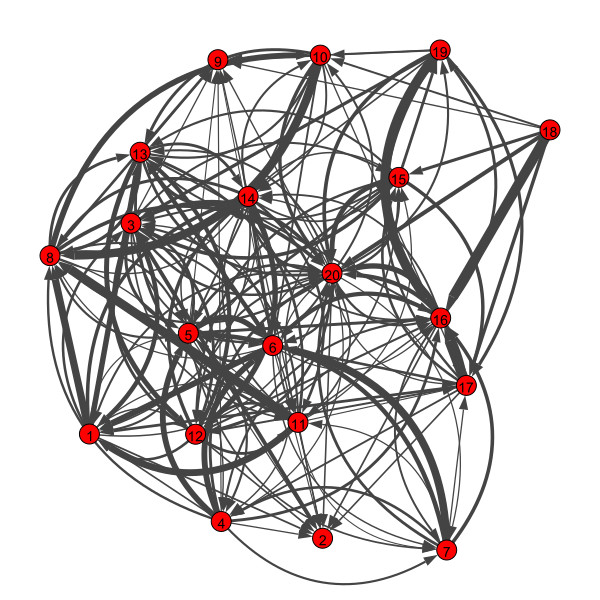

In [14]:
import pandas as pd
from igraph import Graph, plot
import numpy as np

# Load data from CSV
#transactions = pd.read_csv('testfiles\TRANSACTION1.csv', sep=';')

df = transactions[(transactions['FromAccountId'] != 0) | (transactions['ToAccountId'] != 0)].copy()

# Convert IDs to string right after filtering to maintain consistency
df['FromParticipantId'] = df['FromParticipantId'].astype(int).astype(str)
df['ToParticipantId'] = df['ToParticipantId'].astype(int).astype(str)

# Aggregate transaction values by pairs
transaction_sums = df.pivot_table(index=['FromParticipantId', 'ToParticipantId'], values='Value', aggfunc='sum').reset_index()
# Write DataFrame to a text file
transaction_sums.to_csv('df_output.csv', index=False) # Hier zit de fout niet

# Print confirmation message
print("DataFrame has been written to 'df_output.csv'")
filtered_transactions = transaction_sums[(transaction_sums['FromParticipantId'] == 18) & (transaction_sums['ToParticipantId'] == 19)]
print(filtered_transactions)
# Extract unique participant IDs and ensure they are strings
participants = pd.DataFrame({
    'id': pd.concat([df['FromParticipantId'], df['ToParticipantId']]).unique()
})

# Create a graph with participants as nodes, ensuring all are strings
g = Graph(directed=True)
g.add_vertices(participants['id'].tolist())

# Add aggregated edges, ensuring consistency in string usage
for _, row in transaction_sums.iterrows():
    try:
        if row['Value'] != 0:
            g.add_edge(row['FromParticipantId'], row['ToParticipantId'], weight=row['Value'])
    except ValueError as e:
        print(f"Error adding edge from {row['FromParticipantId']} to {row['ToParticipantId']}: {e}")

# Calculate in-degree and out-degree for each participant
in_degree = g.indegree()
out_degree = g.outdegree()

# Print results
for v in g.vs:
    print(f"Participant {v['name']} - In-degree: {in_degree[v.index]}, Out-degree: {out_degree[v.index]}")


# Normalize edge weights for visualization
weights = np.array(g.es["weight"])
normalized_weights = 1 + 9 * (weights - weights.min()) / (weights.max() - weights.min())

# Visualize the graph
layout = g.layout('kk')  # Kamada-Kawai layout
visual_style = {
    "vertex_size": 20,
    "vertex_label": g.vs['name'],
    "edge_width": normalized_weights,  # Adjust edge width scaling as needed
    "layout": layout,
    "bbox": (600, 600),
    "margin": 50
}
plot(g, **visual_style)


## Correlation betweenness and settlement efficiency for each day

In [12]:
settlement_efficiency = pd.read_csv('testfiles\SE_per_participant_day_1.csv', sep=';')
print(settlement_efficiency["settled_input_ratio"])

0     0.513696
1     0.557720
2     0.638333
3     0.529894
4     0.446441
5     0.488629
6     0.695043
7     0.524116
8     0.635027
9     0.431526
10    0.608677
11    0.117841
12    0.805527
13    0.472627
14    0.782312
15    0.779911
16    0.695435
17    0.938178
18    0.436770
19    0.084144
Name: settled_input_ratio, dtype: float64


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\toont\AppData\Local\Temp\ipykernel_15116\2054045946.py:1: SyntaxWarning: invalid escape sequence '\S'
  settlement_efficiency = pd.read_csv('testfiles\SE_per_participant_day_1.csv', sep=';')


<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
C:\Users\toont\AppData\Local\Temp\ipykernel_15116\2117082514.py:9: SyntaxWarning: invalid escape sequence '\S'
  settlement_efficiency_df = pd.read_csv('testfiles\SE_per_participant_day_1.csv', sep=';')


    FromParticipantId  Value_settled   Value_input  settled_input_ratio
0                   1   6.986434e+10  1.360033e+11             0.513696
1                  10   7.825885e+10  1.403193e+11             0.557720
2                  11   5.900869e+10  9.244187e+10             0.638333
3                  12   6.575805e+10  1.240966e+11             0.529894
4                  13   8.334252e+10  1.866820e+11             0.446441
5                  14   7.278618e+10  1.489601e+11             0.488629
6                  15   4.992936e+10  7.183636e+10             0.695043
7                  16   7.432012e+10  1.418009e+11             0.524116
8                  17   5.896538e+10  9.285498e+10             0.635027
9                  18   2.584121e+10  5.988335e+10             0.431526
10                 19   4.703892e+10  7.728060e+10             0.608677
11                  2   4.089812e+09  3.470607e+10             0.117841
12                 20   8.371493e+10  1.039256e+11             0

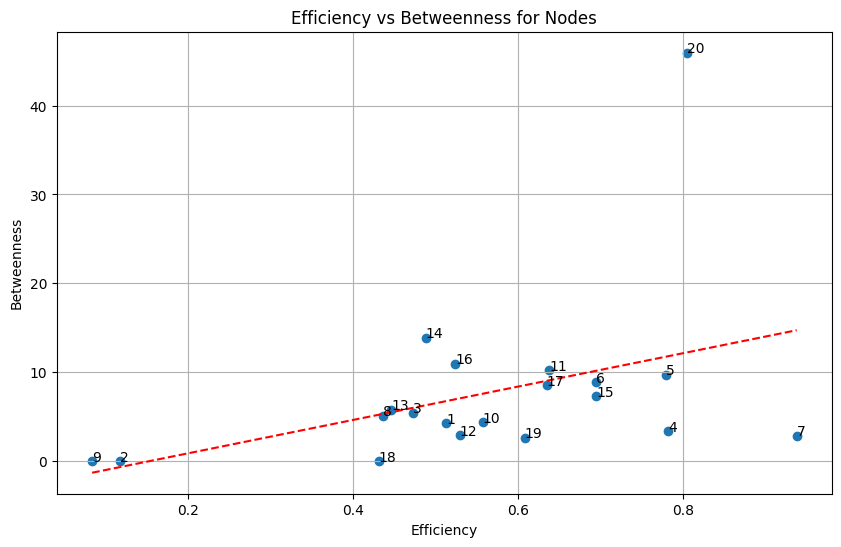

In [79]:
def find_settlement_efficiency(participant_id):
    pass
    return 


def settlement_efficiency_betweenness():
    settlement_efficiency_df = pd.read_csv('testfiles\SE_per_participant_day_1.csv', sep=';')
    print(settlement_efficiency_df)
    nodes=g.vs["name"]
    print(g.betweenness())
    se={}
    bt={}
    for node in nodes:
        betweenness_node=g.betweenness(vertices=node)
        settlement_efficiency = settlement_efficiency_df["settled_input_ratio"][settlement_efficiency_df["FromParticipantId"]==int(node)].values[0]
        se[node] = settlement_efficiency
        print("node: ", node, ", betweenness: ",g.betweenness(vertices=node), ", Settlement efficiency: ", settlement_efficiency)
        se[node]=settlement_efficiency
        bt[node]=betweenness_node
    print(se)
    print(bt)

    nodes = se.keys()
    x_data = [se[node] for node in nodes]
    y_data = [bt[node] for node in nodes]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data)
    # Adding labels for each point
    for i, node in enumerate(nodes):
        plt.text(x_data[i], y_data[i], str(node))
    slope, intercept = np.polyfit(x_data, y_data, 1)
    trendline_x = np.linspace(min(x_data), max(x_data), 100)
    trendline_y = slope * trendline_x + intercept
    plt.plot(trendline_x, trendline_y, color='red', linestyle='--', label=f'Trendline: y={slope:.2f}x+{intercept:.2f}')

    # Adding labels and title
    plt.xlabel('Efficiency')
    plt.ylabel('Betweenness')
    plt.title('Efficiency vs Betweenness for Nodes')

    # Display the plot
    plt.grid(True)
    plt.show()

    return
settlement_efficiency_betweenness()

## Basic Analysis


In [69]:
#print basic network statistics
betw=g.betweenness()
print(betw)
degree=g.degree()
print(degree)
closeness=g.closeness()
print(closeness)
pagerank=g.pagerank()
print(pagerank)
avg_path=g.average_path_length()
print(avg_path)
clustering_coeff=g.transitivity_undirected()
print(clustering_coeff)

[13.863095238095234, 5.10952380952381, 10.944047619047618, 4.3999999999999995, 10.188095238095238, 2.602380952380952, 5.453571428571428, 2.880952380952381, 8.845238095238095, 9.70595238095238, 4.270238095238096, 0.0, 8.52142857142857, 5.767857142857142, 3.326190476190476, 2.867857142857143, 7.295238095238095, 45.958333333333336, 0.0, 0.0]
[25, 17, 19, 14, 21, 11, 18, 17, 21, 22, 18, 6, 16, 18, 16, 13, 17, 35, 11, 11]
[0.8260869565217391, 0.6785714285714286, 0.76, 0.6785714285714286, 0.76, 0.6333333333333333, 0.7037037037037037, 0.6785714285714286, 0.7916666666666666, 0.7916666666666666, 0.7307692307692307, 0.59375, 0.76, 0.7037037037037037, 0.6785714285714286, 0.6129032258064516, 0.6785714285714286, 1.0, 0.7037037037037037, 0.7037037037037037]
[0.06667624000528691, 0.05123040304225492, 0.05651442464576315, 0.03688139531707145, 0.059142469288508144, 0.030668954277780137, 0.05072704543516453, 0.048112274935868254, 0.05353080703720841, 0.0569652547267239, 0.050666100996643586, 0.012560418

### Degree Distribution

In [10]:

# Estimation of the probability denstity function using a kernel-density estimation using Gaussian kernel
kde = gaussian_kde(degree)
# these are the values over wich your kernel will be evaluated
dist_space = np.linspace( min(degree), max(degree), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )
plt.title("Degree distribution")

Text(0.5, 1.0, 'Degree distribution')

In [11]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot 1: Degree distribution
degree=g.degree()
kde = gaussian_kde(degree)
dist_space = np.linspace( min(degree), max(degree), 100 )
axes[0].plot(dist_space, kde(dist_space))
axes[0].set_title("Degree distribution")

# Plot 2: In degree distribution
in_degree=g.indegree()
kde = gaussian_kde(in_degree)
dist_space = np.linspace( min(in_degree), max(in_degree), 100 )
axes[1].plot(dist_space, kde(dist_space))
axes[1].set_title("In Degree Distribution")

# Plot 3: Out Degree distribution
out_degree=g.outdegree()
kde = gaussian_kde(out_degree)
dist_space = np.linspace( min(out_degree), max(out_degree), 100 )
axes[2].plot(dist_space, kde(dist_space))
axes[2].set_title("Out Degree distribution")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Betweenness Distribution

In [13]:
# Estimation of the probability denstity function using a kernel-density estimation using Gaussian kernel
btw=g.betweenness()
kde = gaussian_kde(btw)
# these are the values over wich your kernel will be evaluated
dist_space = np.linspace( min(btw), max(btw), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )
plt.title("Betweenness distribution")

Text(0.5, 1.0, 'Betweenness distribution')

In [71]:
# Find nodes with the highest degree
max_degree_value = max(degree)
max_degree_nodes = [node for node, node_degree in enumerate(degree) if node_degree == max_degree_value]
max_degree_nodes_labels = [g.vs[node]["name"] for node in list(max_degree_nodes)]
max_degree_nodes_id = [g.vs[node]["name"] for node in list(max_degree_nodes)]


# Find nodes with the highest betweenness
btw=g.betweenness()
max_betweenness_value = max(btw)
max_betweenness_nodes = [node for node, betweenness in enumerate(btw) if betweenness == max_betweenness_value]
max_betweenness_nodes_labels = [g.vs[node]["name"] for node in list(max_betweenness_nodes)]
max_betweenness_nodes_id = [g.vs[node]["name"] for node in list(max_betweenness_nodes)]


print(f"Nodes with the highest degree: {max_degree_nodes_labels} (Degree: {max_degree_value})")
print(f"Nodes with the highest betweenness: {max_betweenness_nodes_labels} (Betweenness: {max_betweenness_value})")

Nodes with the highest degree: ['20'] (Degree: 35)
Nodes with the highest betweenness: ['20'] (Betweenness: 45.958333333333336)


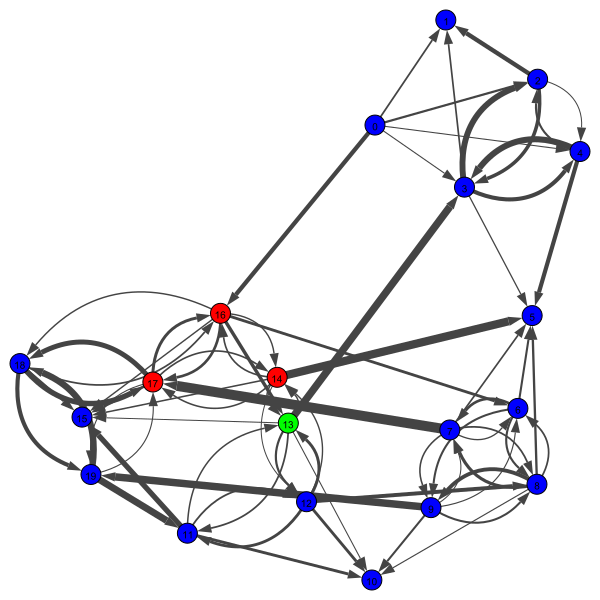

In [15]:
#visual with the nodes with the highest betweenness in yellow
# Normalize edge weights for visualization
weights = np.array(g.es["weight"])
normalized_weights = 1 + 9 * (weights - weights.min()) / (weights.max() - weights.min())
# Create plot using Fruchterman-Rheingold
layout_fr = g.layout("fr")

visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"]=10
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = g.vs["name"]
visual_style["layout"] = layout_fr
visual_style["edge_width"]=normalized_weights
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

#give a different colour to the nodes with the highest betweenness, and highest degree
g.vs['color']='blue'
for i in max_betweenness_nodes:
  g.vs[i]['color']='yellow'
for i in max_degree_nodes:
  g.vs[i]['color']='red'
for i in max_degree_nodes and max_betweenness_nodes:
  g.vs[i]['color']='green'

visual_style["vertex_color"] = g.vs['color']


ig.plot(g, **visual_style)

In [23]:
#run this cell to remove the nodes with the highest degree
#it takes a few iterations with deletion of nodes before the network starts to collapse

max_degree_nodes = [node for node, node_degree in enumerate(g.degree()) if node_degree == max(g.degree())]
g.delete_vertices(max_degree_nodes)
print("number of nodes removed:", len(max_degree_nodes))

weights = np.array(g.es["weight"])
normalized_weights = 1 + 9 * (weights - weights.min()) / (weights.max() - weights.min())
# Create plot using Fruchterman-Rheingold
layout_fr = g.layout("fr")

visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"]=10
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = g.vs["name"]
visual_style["layout"] = layout_fr
visual_style["edge_width"]=normalized_weights
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

#give a different colour to the nodes with the highest betweenness, and highest degree
g.vs['color']='blue'
for i in max_betweenness_nodes:
  g.vs[i]['color']='yellow'
for i in max_degree_nodes:
  g.vs[i]['color']='red'
for i in max_degree_nodes and max_betweenness_nodes:
  g.vs[i]['color']='green'

visual_style["vertex_color"] = g.vs['color']
ig.plot(g)

number of nodes removed: 4


ValueError: zero-size array to reduction operation minimum which has no identity

## Community Detection


## Proberen om visual met heatmap te maken maar nog niet gelukt

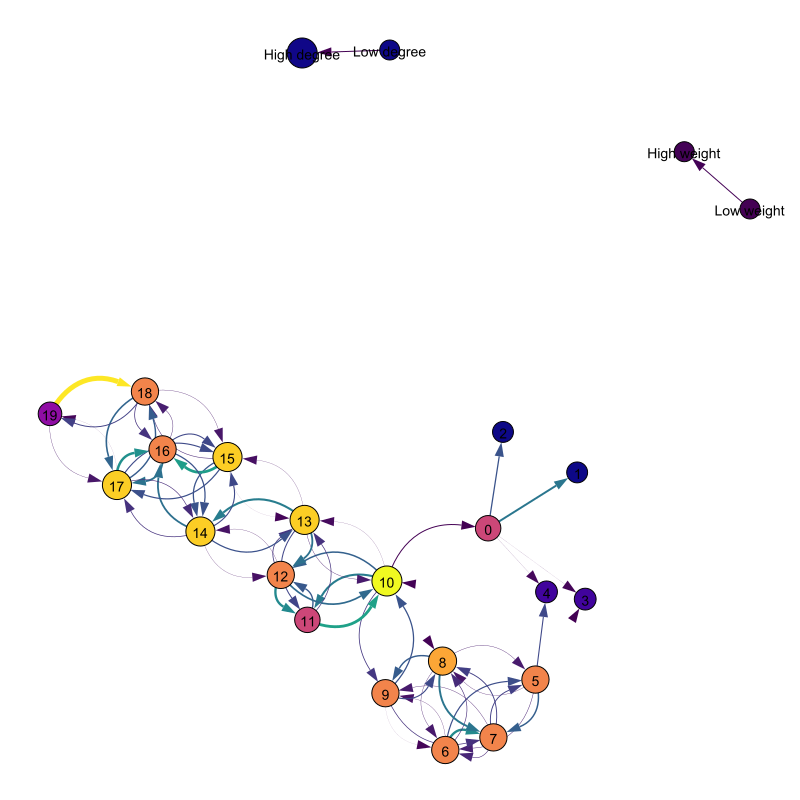

In [73]:
import pandas as pd
from igraph import Graph, plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Correct import for color handling

# Load data from CSV
transactions = pd.read_csv('TRANSACTION1.csv', sep=';')
df = transactions[(transactions['FromAccountId'] != 0) | (transactions['ToAccountId'] != 0)].copy()

# Convert IDs to string right after filtering to maintain consistency
df['FromParticipantId'] = df['FromParticipantId'].astype(int).astype(str)
df['ToParticipantId'] = df['ToParticipantId'].astype(int).astype(str)

# Aggregate transaction values by pairs
transaction_sums = df.groupby(['FromParticipantId', 'ToParticipantId']).agg({
    'Value': 'sum'
}).reset_index()

# Extract unique participant IDs and ensure they are strings
participants = pd.DataFrame({
    'id': pd.concat([df['FromParticipantId'], df['ToParticipantId']]).unique()
})

# Create a graph with participants as nodes, ensuring all are strings
g = Graph(directed=True)
g.add_vertices(participants['id'].tolist())

# Add aggregated edges, ensuring consistency in string usage
for _, row in transaction_sums.iterrows():
    g.add_edge(row['FromParticipantId'], row['ToParticipantId'], weight=row['Value'])

# Calculate degrees for vertex size and color scaling
degrees = g.degree()
max_degree = max(degrees)
vertex_sizes = [20 + 10 * (deg / max_degree) for deg in degrees]
degree_normalized = (np.array(degrees) - min(degrees)) / (max(degrees) - min(degrees))

# Normalize edge weights for visualization
weights = np.array(g.es["weight"])
normalized_weights = (weights - weights.min()) / (weights.max() - weights.min())
edge_colors = plt.cm.viridis(normalized_weights)
vertex_colors = plt.cm.plasma(degree_normalized)

# Convert color arrays to hex codes or tuples
edge_colors = [mcolors.rgb2hex(color) for color in edge_colors]
vertex_colors = [mcolors.rgb2hex(color) for color in vertex_colors]

# Adding legend elements
legend_vertices = ['Low degree', 'High degree', 'Low weight', 'High weight']
g.add_vertices(legend_vertices)
legend_colors = [mcolors.rgb2hex(plt.cm.plasma(0)), mcolors.rgb2hex(plt.cm.plasma(1)),
                 mcolors.rgb2hex(plt.cm.viridis(0)), mcolors.rgb2hex(plt.cm.viridis(1))]
legend_sizes = [20, 30, 20, 20]
legend_edges = [(legend_vertices[0], legend_vertices[1]), (legend_vertices[2], legend_vertices[3])]
g.add_edges(legend_edges)
edge_indices = [g.get_eid(legend_vertices[0], legend_vertices[1]), g.get_eid(legend_vertices[2], legend_vertices[3])]
for i in edge_indices:
    g.es[i]['width'] = 1

# Update visual style for the legend
visual_style = {
    "vertex_size": vertex_sizes + legend_sizes,
    "vertex_color": vertex_colors + legend_colors,
    "vertex_label": list(g.vs['name']) + legend_vertices,
    "edge_width": list(normalized_weights * 5) + [1, 1],  # Ensure correct list length and type
    "edge_color": list(edge_colors) + [mcolors.rgb2hex(plt.cm.viridis(0)), mcolors.rgb2hex(plt.cm.viridis(1))],
    "layout": g.layout('kk'),  # Kamada-Kawai layout
    "bbox": (800, 800),  # Increased the bounding box size
    "margin": 50
}

plot(g, **visual_style)
